# Intermediate unit testing
In this chapter, you will write more advanced unit tests. Starting from testing complicated data types like NumPy arrays to testing exception handling, you'll do it all. Once you have mastered the science of testing, we will also focus on the arts. For example, we will learn how to find the balance between writing too many tests and too few tests. In the last lesson, you will get introduced to a radically new programming methodology called Test Driven Development (TDD) and put it to practice. This might actually change the way you code forever!

## Write an informative test failure message
The test result reports become a lot easier to read when you make good use of the optional message argument of the assert statement.

In a previous exercise, you wrote a test for the convert_to_int() function. The function takes an integer valued string with commas as thousand separators e.g. "2,081" as argument and should return the integer 2081.

In this exercise, you will rewrite the test called test_on_string_with_one_comma() so that it prints an informative message if the test fails.

In [1]:
import pytest
from utils.preprocessing_helpers import convert_to_int

def test_on_string_with_one_comma():
    test_argument = "2,081"
    expected = 2081
    actual = convert_to_int(test_argument)
    # Format the string with the actual return value
    message = "convert_to_int('2,081') should return the int 2081, but it actually returned {0}".format(actual)
    # Write the assert statement which prints message on failure
    assert actual == expected, message
    

## Question
The test that you wrote was written to a test module called test_convert_to_int.py. Run the test in the IPython console and read the test result report.

Which of the following is true?

In [2]:
!pytest utils/test_convert_to_int.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 2 items                                                              

utils/test_convert_to_int.py .F                                          [100%]

=================================== FAILURES ===================================
______________________ test_on_string_with_one_comma_ch2 _______________________

    def test_on_string_with_one_comma_ch2():
      test_argument = "2,081"
      expected = 2081
      actual = convert_to_int_ch2(test_argument)
      message = "convert_to_int('2,081') should return the int 2081, but it actually returned {0}".format(actual)
>     assert actual == expected, message
E     AssertionError: convert_to_int('2,081') should return the in

The test fails because convert_to_int("2,081") returns None and not the integer 2081.

That's right! It is a lot easier to understand the custom message that you wrote than the automatic messages that pytest prints. Therefore, it is recommended that you add custom failure messages to all assert statements that you write in the future.

## Testing float return values
The get_data_as_numpy_array() function (which was called mystery_function() in one of the previous exercises) takes two arguments: the path to a clean data file and the number of data columns in the file . An example file has been printed out in the IPython console. It contains three rows.

The function converts the data into a 3x2 NumPy array with dtype=float64. The expected return value has been stored in a variable called expected. Print it out to see it.

The housing areas are in the first column and the housing prices are in the second column. This array will be the features that will be fed to the linear regression model for learning.

The return value contains floats. Therefore you have to be especially careful when writing unit tests for this function.


In [3]:
import numpy as np
import pytest
from utils.as_numpy import get_data_as_numpy_array

def test_on_clean_file():
  expected = np.array([[2081.0, 314942.0],
                       [1059.0, 186606.0],
  					   [1148.0, 206186.0]
                       ]
                      )
  actual = get_data_as_numpy_array("example_clean_data.txt", num_columns=2)
  message = "Expected return value: {0}, Actual return value: {1}".format(expected, actual)
  # Complete the assert statement
  assert actual == pytest.approx(expected), message


Well done! The pytest.approx() function not only works for NumPy arrays containing floats, but also for lists and dictionaries containing floats.

## Testing with multiple assert statements
You're now going to test the function split_into_training_and_testing_sets() from the models module.

It takes a n x 2 NumPy array containing housing area and prices as argument. To see an example argument, print the variable example_argument in the IPython console.

The function returns a 2-tuple of NumPy arrays (training_set, testing_set). The training set contains int(0.75 * n) (approx. 75%) randomly selected rows of the argument array. The testing set contains the remaining rows.

Print the variable expected_return_value in the IPython console. example_argument had 6 rows. Therefore the training array has int(0.75 * 6) = 4 of its rows and the testing array has the remaining 2 rows.

numpy as np, pytest and split_into_training_and_testing_sets have been imported for you.



In [4]:
def test_on_six_rows():
    example_argument = np.array([[2081.0, 314942.0], [1059.0, 186606.0],
                                 [1148.0, 206186.0], [1506.0, 248419.0],
                                 [1210.0, 214114.0], [1697.0, 277794.0]]
                                )
    # Fill in with training array's expected number of rows
    expected_training_array_num_rows = 4
    # Fill in with testing array's expected number of rows
    expected_testing_array_num_rows = 2
    actual = split_into_training_and_testing_sets(example_argument)
    # Write the assert statement checking training array's number of rows
    assert actual[0].shape[0] == expected_training_array_num_rows, "The actual number of rows in the training array is not {}".format(expected_training_array_num_rows)
    # Write the assert statement checking testing array's number of rows
    assert actual[1].shape[0] == expected_testing_array_num_rows, "The actual number of rows in the testing array is not {}".format(expected_testing_array_num_rows)

## Practice the context manager
In pytest, you can test whether a function raises an exception by using a context manager. Let's practice your understanding of this important context manager, the with statement and the as clause.

At any step, feel free to run the code by pressing the "Run Code" button and check if the output matches your expectations.

Complete the with statement by filling in with a context manager that will silence the ValueError raised in the context.

In [5]:
import pytest

# Fill in with a context manager that will silence the ValueError
with pytest.raises(ValueError):
    raise ValueError

Complete the with statement with a context manager that raises Failed if no OSError is raised in the context.

In [6]:
import pytest

try:
    # Fill in with a context manager that raises Failed if no OSError is raised
    with pytest.raises(OSError):
        raise ValueError
except:
    print("pytest raised an exception because no OSError was raised in the context.")

pytest raised an exception because no OSError was raised in the context.


Extend the with statement so that any raised ValueError is stored in the variable exc_info.

In [7]:
import pytest

# Store the raised ValueError in the variable exc_info
with pytest.raises(ValueError) as exc_info:
    raise ValueError("Silence me!")

Write an assert statement to check if the raised ValueError contains the message "Silence me!".

In [8]:
import pytest

with pytest.raises(ValueError) as exc_info:
    raise ValueError("Silence me!")
# Check if the raised ValueError contains the correct message
assert exc_info.match("Silence me!")

## Unit test a ValueError
Sometimes, you want a function to raise an exception when called on bad arguments. This prevents the function from returning nonsense results or hard-to-interpret exceptions. This is an important behavior which should be unit tested.

Remember the function split_into_training_and_testing_sets()? It takes a NumPy array containing housing area and prices as argument. The function randomly splits the array row wise into training and testing arrays in the ratio 3:1, and returns the resulting arrays in a tuple.

If the argument array has only 1 row, the testing array will be empty. To avoid this situation, you want the function to not return anything, but raise a ValueError with the message "Argument data_array must have at least 2 rows, it actually has just 1".

- Fill in with the correct context manager that checks if split_into_training_and_testing_sets() raises a ValueError when called on test_argument, which is a NumPy array with a single row.

- Complete the with statement so that information about any raised ValueError will be stored in the variable exc_info.

- Write an assert statement to check if the raised ValueError contains the correct message stored in the variable expected_error_msg.

In [9]:
import numpy as np
import pytest
from utils.train import split_into_training_and_testing_sets

def test_on_one_row():
    test_argument = np.array([[1382.0, 390167.0]])
    # Store information about raised ValueError in exc_info
    with pytest.raises(ValueError) as exc_info:
      split_into_training_and_testing_sets(test_argument)
    expected_error_msg = "Argument data_array must have at least 2 rows, it actually has just 1"
    # Check if the raised ValueError contains the correct message
    assert exc_info.match(expected_error_msg)

## Question
The test test_on_one_row() was written to the test module test_split_into_training_and_testing_sets.py. Run the test in the IPython console and read the test result report. Does the test pass or fail?

In [10]:
!pytest utils/test_split_into_training_and_testing_sets.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 1 item                                                               

utils/test_split_into_training_and_testing_sets.py .                     [100%]

============================== 1 passed in 0.14s ===============================


The test passes.

## Testing well: Boundary values
Remember row_to_list()? It takes a row containing housing area and prices e.g. "2,041\t123,781\n" and returns the data as a list e.g. ["2,041", "123,781"].

A row can be mapped to a 2-tuple (m, n), where m is the number of tab separators. n is 1 if the row has any missing values, and 0 otherwise.

For example,

- "123\t456\n"  (1, 0).
- "\t456\n"  (1, 1).
- "\t456\t\n"  (2, 1).

The function only returns a list for arguments mapping to (1, 0). All other tuples correspond to invalid rows, with either more than one tab or missing values. The function returns None in all these cases. See the plot.

This mapping shows that the function has normal behavior at (1, 0), and special behavior everywhere else.

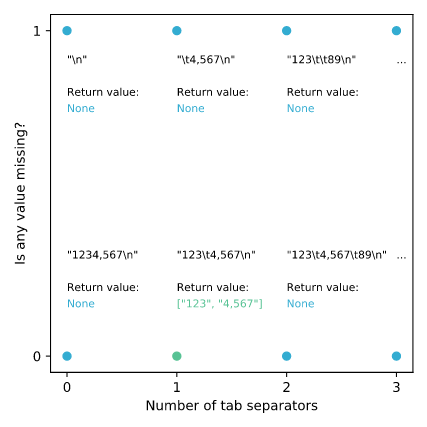

## Question
Which are the boundary values for this function, according to the plot?

Answer: (0, 0), (2, 0) and (1, 1).

Assign actual to the return value of row_to_list() on the argument "123\n", which is an instance of the boundary value (0, 0).

In [11]:
import pytest
from utils.preprocessing_helpers import row_to_list

def test_on_no_tab_no_missing_value():    # (0, 0) boundary value
    # Assign actual to the return value for the argument "123\n"
    actual = None
    assert actual is None, "Expected: None, Actual: {0}".format(actual)

Complete the assert statement to check if row_to_list() indeed returns None for the instance "123\t4,567\t89\n" of the boundary value (2, 0).

In [12]:
def test_on_two_tabs_no_missing_value():    # (2, 0) boundary value
    actual = row_to_list("123\t4,567\t89\n")
    # Complete the assert statement
    assert actual is None, "Expected: None, Actual: {0}".format(actual)

In the test test_on_one_tab_with_missing_value(), format the failure message with the actual return value.

In [13]:
def test_on_one_tab_with_missing_value():    # (1, 1) boundary value
    actual = row_to_list("\t4,567\n")
    # Format the failure message
    assert actual is None, "Expected: None, Actual: {0}".format(actual)

## Testing well: Values triggering special logic
Look at the plot. The boundary values of row_to_list() are now marked in orange. The normal argument is marked in green and the values triggering special behavior are marked in blue.

In the last exercise, you wrote tests for boundary values. In this exercise, you are going to write tests for values triggering special behavior, in particular, (0, 1) and (2, 1). These are values triggering special logic since the function returns None instead of a list.

- Assign the variable actual to the actual return value for "\n".
- Complete the assert statement for test_on_no_tab_with_missing_value(), making sure to format the failure message appropriately.
- Assign the variable actual to the actual return value for "123\t\t89\n".
- Complete the assert statement for test_on_two_tabs_with_missing_value(), making sure to format the failure message appropriately.

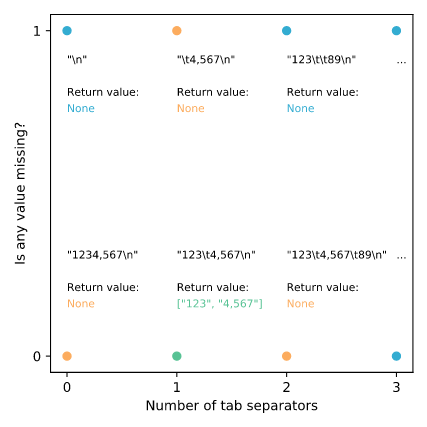

In [14]:
import pytest
from utils.preprocessing_helpers import row_to_list

def test_on_no_tab_with_missing_value():    # (0, 1) case
    # Assign to the actual return value for the argument "\n"
    actual = row_to_list("\n")
    # Write the assert statement with a failure message
    assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
def test_on_two_tabs_with_missing_value():    # (2, 1) case
    # Assign to the actual return value for the argument "123\t\t89\n"
    actual = row_to_list("123\t\t89\n")
    # Write the assert statement with a failure message
    assert actual is None, "Expected: None, Actual: {0}".format(actual)

Kudos! You have now written tests for both boundary values and values triggering special logic for row_to_list(). 

## Testing well: Normal arguments
This time, you will test row_to_list() with normal arguments i.e. arguments mapping to the tuple (1, 0). The plot is provided to you for reference.

Remembering that the best practice is to test for two to three normal arguments, you will write two tests in this exercise.

## Question
How many normal arguments is it recommended to test?

Answer: At least two or three.

Assign the variable expected to the expected return value for the normal argument "123\t4,567\n".

In [15]:
import pytest
from utils.preprocessing_helpers import row_to_list

def test_on_normal_argument_1():
    actual = row_to_list("123\t4,567\n")
    # Fill in with the expected return value for the argument "123\t4,567\n"
    expected = ['123', '4,567']
    assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)

Complete the correct assert statement for test_on_normal_argument_2(), making sure to format the failure message appropriately.

In [16]:
def test_on_normal_argument_2():
    actual = row_to_list("1,059\t186,606\n")
    expected = ["1,059", "186,606"]
    # Write the assert statement along with a failure message
    assert actual == expected, "Expected: {0}, Actual: {1}".format(expected, actual)

## Question
The tests for boundary values, values triggering special behavior and normal arguments have been written to a test module test_row_to_list.py. Run the tests in the IPython shell. Which bugs does the function have?

In [17]:
!pytest utils/test_row_to_list.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 7 items                                                              

utils/test_row_to_list.py .......                                        [100%]

============================== 7 passed in 0.13s ===============================


The function does not have any bugs.


Well done! You tested the function row_to_list() on boundary values, values triggering special behavior and normal arguments. All the tests are passing. So you can be quite confident that the function is correctly coded! Note that this function does not have bad arguments, so you did not write any tests for that. Also note how mapping the arguments to tuples enabled us to categorize the arguments easily. Use this trick for other functions whenever applicable ;-)

## TDD: Tests for normal arguments
In this and the following exercises, you will implement the function convert_to_int() using Test Driven Development (TDD). In TDD, you write the tests first and implement the function later.

Normal arguments for convert_to_int() are integer strings with comma as thousand separators. Since the best practice is to test a function for two to three normal arguments, here are three examples with no comma, one comma and two commas respectively.


| Argument       | Expected return value  | 
| :------------- | :----------: | 
|  "756" | 756  |
| "2,081"  | 2081 |
| "1,034,891"	 | 1034891 | 





Since the convert_to_int() function does not exist yet, you won't be able to import it. But you will use it in the tests anyway. That's how TDD works.

pytest has already been imported for you.

- Complete the assert statement for test_with_no_comma() by inserting the correct boolean expression.
- Complete the assert statement for test_with_one_comma() by inserting the correct boolean expression.
- Complete the assert statement for test_with_two_commas() by inserting the correct boolean expression.

In [18]:
def test_with_no_comma():
    actual = convert_to_int("756")
    # Complete the assert statement
    assert actual == 756, "Expected: 756, Actual: {0}".format(actual)
    
def test_with_one_comma():
    actual = convert_to_int("2,081")
    # Complete the assert statement
    assert actual == 2081, "Expected: 2081, Actual: {0}".format(actual)
    
def test_with_two_commas():
    actual = convert_to_int("1,034,891")
    # Complete the assert statement
    assert actual == 1034891, "Expected: 1034891, Actual: {0}".format(actual)

## TDD: Requirement collection
What should convert_to_int() do if the arguments are not normal? In particular, there are three special argument types:

1. Arguments that are missing a comma e.g. "178100,301".
2. Arguments that have the comma in the wrong place e.g. "12,72,891".
3. Float valued strings e.g. "23,816.92".

Also, should convert_to_int() raise an exception for specific argument values?

When your boss asked you to implement the function, she didn't say anything about these cases! But since you want to write tests for special and bad arguments as a part of TDD, you go and ask your boss.

She says that convert_to_int() should return None for every special argument and there are no bad arguments for this function.

pytest has been imported for you.

- Give a name to the test by using the standard name prefix that pytest expects followed by on_string_with_missing_comma.
- Assign actual to the actual return value for the argument "12,72,891".
- Complete the assert statement.

In [19]:
# Give a name to the test for an argument with missing comma
def test_on_string_with_missing_comma():
    actual = convert_to_int("178100,301")
    assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
def test_on_string_with_incorrectly_placed_comma():
    # Assign to the actual return value for the argument "12,72,891"
    actual = convert_to_int("12,72,891")
    assert actual is None, "Expected: None, Actual: {0}".format(actual)
    
def test_on_float_valued_string():
    actual = convert_to_int("23,816.92")
    # Complete the assert statement
    assert actual is None, "Expected: None, Actual: {0}".format(actual)

## Question
The tests for normal and special arguments have been written to a test module test_convert_to_int.py. Run it in the IPython console and read the test result report. What happens?

In [20]:
!pytest utils/test_convert_to_int_ch2.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 6 items                                                              

utils/test_convert_to_int_ch2.py ......                                  [100%]

============================== 6 passed in 0.15s ===============================


All tests are failing with a NameError since convert_to_int() has not been implemented yet.

Yes! In TDD, the first run of the tests always fails with a NameError or ImportError because the function does not exist yet. In the next exercise, you will implement the function and fix this. But before you move on, notice how thinking about special and bad arguments crystallized the requirements for the function. This will help us immensely in implementing the function in the coming exercise.

## TDD: Implement the function
convert_to_int() returns None for the following:

1. Arguments with missing thousands comma e.g. "178100,301". If you split the string at the comma using "178100,301".split(","), then the resulting list ["178100", "301"] will have at least one entry with length greater than 3 e.g. "178100".

2. Arguments with incorrectly placed comma e.g. "12,72,891". If you split this at the comma, then the resulting list is ["12", "72", "891"]. Note that the first entry is allowed to have any length between 1 and 3. But if any other entry has a length other than 3, like "72", then there's an incorrectly placed comma.

3. Float valued strings e.g. "23,816.92". If you remove the commas and call int() on this string i.e. int("23816.92"), you will get a ValueError.

Complete the if statement that checks if the i-th element of comma_separated_parts has length greater than 3.

In [21]:
def convert_to_int(integer_string_with_commas):
    comma_separated_parts = integer_string_with_commas.split(",")
    for i in range(len(comma_separated_parts)):
        # Write an if statement for checking missing commas
        if len(comma_separated_parts[i]) > 3:
            return None

Complete the if statement that checks if any entry other than the 0-th entry of comma_separated_parts has a length not equal to 3.

In [22]:
def convert_to_int(integer_string_with_commas):
    comma_separated_parts = integer_string_with_commas.split(",")
    for i in range(len(comma_separated_parts)):
        # Write an if statement for checking missing commas
        if len(comma_separated_parts[i]) > 3:
            return None
        # Write the if statement for incorrectly placed commas
        if i != 0 and len(comma_separated_parts[i]) != 3:
            return None

Fill in the except clause with a ValueError, which is raised when trying to convert float valued strings e.g. 23816.92 to an integer.

In [23]:
def convert_to_int(integer_string_with_commas):
    comma_separated_parts = integer_string_with_commas.split(",")
    for i in range(len(comma_separated_parts)):
        # Write an if statement for checking missing commas
        if len(comma_separated_parts[i]) > 3:
            return None
        # Write the if statement for incorrectly placed commas
        if i != 0 and len(comma_separated_parts[i]) != 3:
            return None
    integer_string_without_commas = "".join(comma_separated_parts)
    try:
        return int(integer_string_without_commas)
    # Fill in with a ValueError
    except ValueError:
        return None

## Question
Now that you have implemented the convert_to_int() function, let's run the tests in the test module test_convert_to_int.py again. Run it the IPython console and read the test result report. Did you implement the function correctly, or are there any bugs?

In [24]:
!pytest utils/test_convert_to_int_ch2.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 6 items                                                              

utils/test_convert_to_int_ch2.py ......                                  [100%]

============================== 6 passed in 0.14s ===============================


All tests are passing and the implementation does not have a bug.
